In [7]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance, Comparison
from utils import smooth

# global + episodic (1)

SuperMarioBros-1-1-v3 E3B+RND (5, 20)
SuperMarioBros-1-1-v3 E3B+ICM (5, 20)
SuperMarioBros-1-1-v3 E3B+RIDE (5, 20)
SuperMarioBros-1-1-v3 RE3+RND (5, 20)
SuperMarioBros-1-1-v3 RE3+ICM (5, 20)
SuperMarioBros-1-1-v3 RE3+RIDE (5, 20)
SuperMarioBrosRandomStages E3B+RND (5, 20)
SuperMarioBrosRandomStages E3B+ICM (5, 20)
SuperMarioBrosRandomStages E3B+RIDE (5, 20)
SuperMarioBrosRandomStages RE3+RND (5, 20)
SuperMarioBrosRandomStages RE3+ICM (5, 20)
SuperMarioBrosRandomStages RE3+RIDE (5, 20)


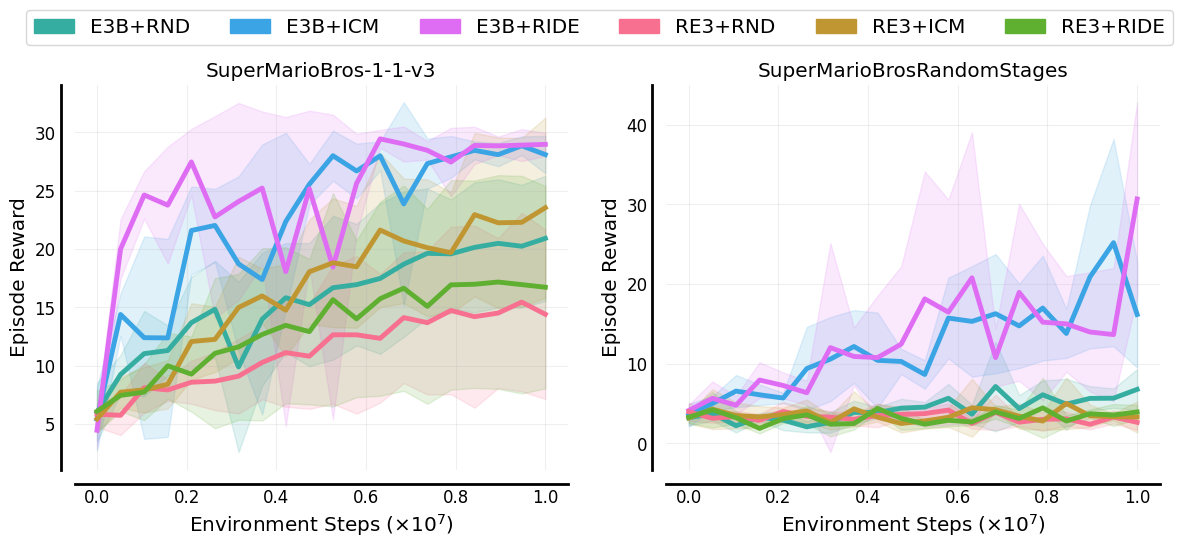

In [8]:
algos = ['E3B+RND', 'E3B+ICM', 'E3B+RIDE', 'RE3+RND', 'RE3+ICM', 'RE3+RIDE']
colors = sns.husl_palette(len(algos), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for subplot_idx, candidate in enumerate(['SuperMarioBros-1-1-v3', 'SuperMarioBrosRandomStages']):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8/{candidate}/"
    num_points = 20
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                # data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[subplot_idx]
        x = np.linspace(0, 1, num_points)
        ax.plot(x, mean, linewidth=3.5, c=colors[algo_idx], label=algo)
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[algo_idx])
        ax.set_title(candidate, fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, algos, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.05))
fig.savefig('figure_rq8_curves_ge.pdf', bbox_inches='tight', dpi=300)

# global+global

SuperMarioBros-1-1-v3 ICM+RND (5, 10)
SuperMarioBros-1-1-v3 RIDE+RND (5, 10)
SuperMarioBros-1-1-v3 ICM+RIDE (5, 10)
SuperMarioBrosRandomStages ICM+RND (5, 10)
SuperMarioBrosRandomStages RIDE+RND (5, 10)
SuperMarioBrosRandomStages ICM+RIDE (5, 10)


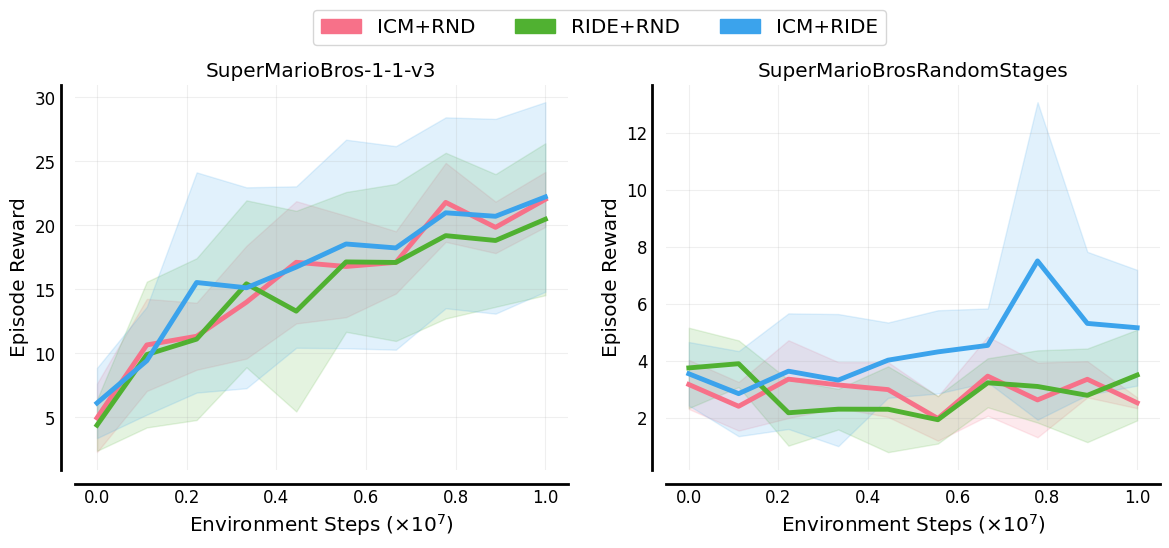

In [3]:
algos = ['ICM+RND', 'RIDE+RND', 'ICM+RIDE']
colors = sns.husl_palette(len(algos))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for subplot_idx, candidate in enumerate(['SuperMarioBros-1-1-v3', 'SuperMarioBrosRandomStages']):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8/{candidate}/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                # data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[subplot_idx]
        x = np.linspace(0, 1, num_points)
        ax.plot(x, mean, linewidth=3.5, c=colors[algo_idx], label=algo)
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[algo_idx])
        ax.set_title(candidate, fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, algos, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.05))
fig.savefig('figure_rq8_curves_gg.pdf', bbox_inches='tight', dpi=300)

In [8]:
# colors = sns.husl_palette(len(algos), 0.5)
# fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]
# fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))


pdf = {'candidate': [], 'algo': [], 'reward': []}
single_algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
mixed_algos = ['E3B+RND', 'E3B+ICM', 'E3B+RIDE', 'RE3+RND', 'RE3+ICM', 'RE3+RIDE', 'ICM+RND', 'RND+RIDE', 'ICM+RIDE']

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8_new/baselines/"
for algo in single_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('bs')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-50:].mean(), 0, 50) / 30)

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8_new/old_best_configs/"
for algo in single_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('old_best')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-50:].mean(), 0, 50) / 30)

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q7_new/"
for algo in single_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('new_best')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-100:].mean(), 0, 50) / 30)

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8_new/new_mixed_with_best_configs/"
for algo in mixed_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('new_mixed')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-100:].mean(), 0, 50) / 30)

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8_new/old_mixed_with_best_configs/"
for algo in mixed_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('old_mixed')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-100:].mean(), 0, 50) / 30)

root = f"/Users/yuanmingqi/Downloads/nips2024_data/q8_new/mixed_with_baselines/"
for algo in mixed_algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']

            pdf['candidate'].append('bs_mixed')
            pdf['algo'].append(algo)
            pdf['reward'].append(np.clip(data[-100:].mean(), 0, 50) / 30)
pdf = pd.DataFrame(pdf)

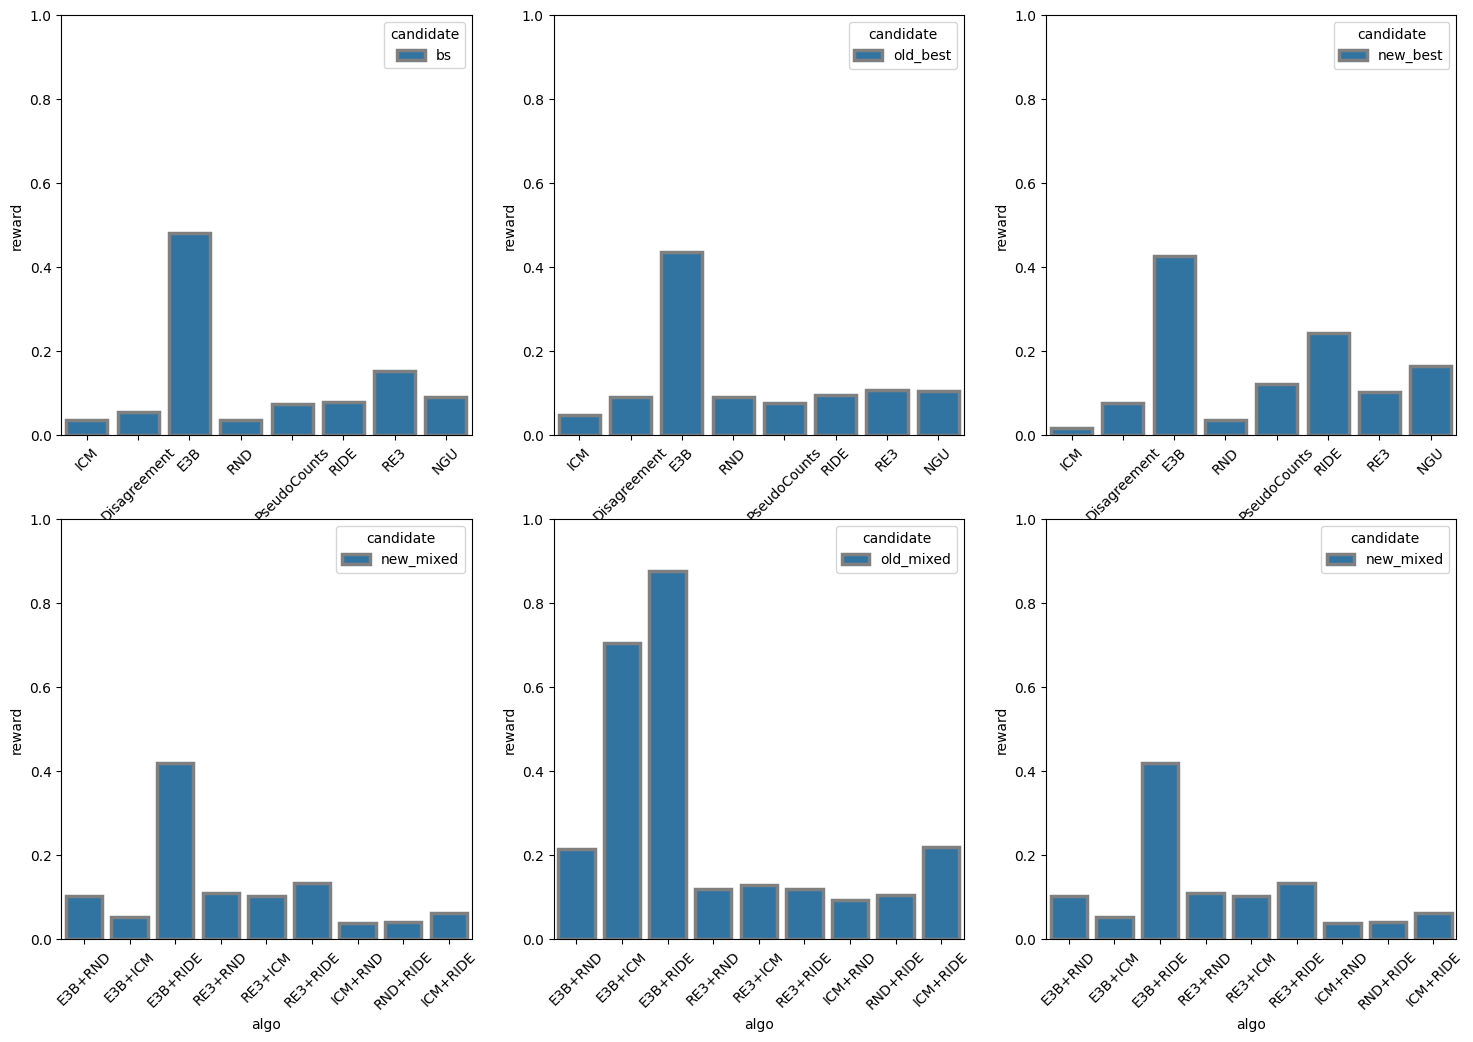

In [5]:
pdf = pd.DataFrame(pdf)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

sns.barplot(data=pdf[pdf['algo'].isin(single_algos) & pdf['candidate'].isin(['bs'])],
            x='algo', y='reward', 
    hue='candidate', ax=axes[0],
    errorbar=None, capsize=.2,
    linewidth=2.5, edgecolor=".5")

sns.barplot(data=pdf[pdf['algo'].isin(single_algos) & pdf['candidate'].isin(['old_best'])],
                x='algo', y='reward', 
        hue='candidate', ax=axes[1],
        errorbar=None, capsize=.2,
        linewidth=2.5, edgecolor=".5")

sns.barplot(data=pdf[pdf['algo'].isin(single_algos) & pdf['candidate'].isin(['new_best'])],
                x='algo', y='reward', 
        hue='candidate', ax=axes[2],
        errorbar=None, capsize=.2,
        linewidth=2.5, edgecolor=".5")

sns.barplot(data=pdf[pdf['algo'].isin(mixed_algos) & pdf['candidate'].isin(['old_mixed'])],
                x='algo', y='reward', 
        hue='candidate', ax=axes[4],
        errorbar=None, capsize=.2,
        linewidth=2.5, edgecolor=".5")

sns.barplot(data=pdf[pdf['algo'].isin(mixed_algos) & pdf['candidate'].isin(['new_mixed'])],
                x='algo', y='reward', 
        hue='candidate', ax=axes[5],
        errorbar=None, capsize=.2,
        linewidth=2.5, edgecolor=".5")

sns.barplot(data=pdf[pdf['algo'].isin(mixed_algos) & pdf['candidate'].isin(['new_mixed'])],
                x='algo', y='reward', 
        hue='candidate', ax=axes[3],
        errorbar=None, capsize=.2,
        linewidth=2.5, edgecolor=".5")

for ax in axes:
    ax.set_ylim(0, 1.0)
    ax.tick_params(axis='x', rotation=45)

Text(0.5, 0, 'Normalized Return')

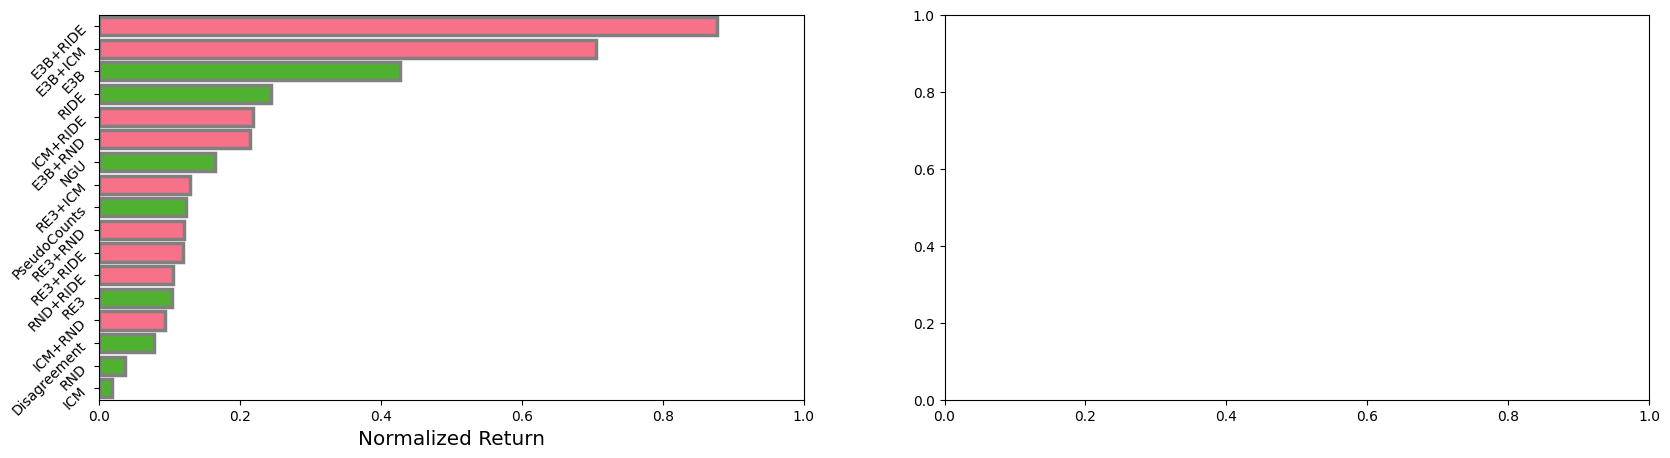

In [9]:
palette = sns.husl_palette(3)
part_data = pdf[pdf['candidate'].isin(['new_best', 'old_mixed'])]

mean_values = part_data.groupby('algo')['reward'].mean().sort_values(ascending=False).reset_index() 
part_data = part_data.merge(mean_values, on='algo', suffixes=('', '_mean'))
part_data = part_data.sort_values('reward_mean', ascending=False)
category_order = mean_values['algo']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
barplot = sns.barplot(data=part_data,
                x='reward', y='algo', 
                color=palette[0],
                order=category_order,
                ax=axes[0], 
                errorbar=None, capsize=.2, 
                linewidth=2.5, edgecolor=".5", 
                orient='h')
for bar in barplot.patches:
    # get bar name using mean_values
    name = mean_values[mean_values['reward'].round(4) == bar.get_width().round(4)]['algo'].values[0]
    if name in single_algos:
        bar.set_facecolor(palette[1])
    else:
        bar.set_facecolor(palette[0])

axes[0].set_xlim(0, 1.0)
axes[0].tick_params(axis='y', rotation=45)
axes[0].set_ylabel('')
axes[0].set_xlabel('Normalized Return', fontsize='x-large')

In [101]:
# print(part_data)
# single_rewards = part_data[part_data['algo'].isin(single_algos)]
# print(single_rewards)
# # reshape to (num_algos, num_repeats)
# single_rewards = single_rewards['reward'].values.reshape(8, 5).T
# print(single_rewards)

# score_x = part_data[part_data['algo'].isin(mixed_algos)]['reward'].values.reshape(9, 5).T
# score_y = part_data[part_data['algo'].isin(['E3B', 'RE3', 'ICM', 'RND', 'RIDE'])]['reward'].values.reshape(5, 5).T

# agg_mean_x = Performance(scores=score_x, get_ci=True).aggregate_mean()
# agg_iqm_x = Performance(scores=score_x, get_ci=True).aggregate_median()
# agg_mean_y = Performance(scores=score_y, get_ci=True).aggregate_mean()
# agg_iqm_y = Performance(scores=score_y, get_ci=True).aggregate_median()
# agg_median_x = Performance(scores=score_x, get_ci=True).aggregate_median()
# agg_median_y = Performance(scores=score_y, get_ci=True).aggregate_median()
# agg_og_x = Performance(scores=score_x, get_ci=True).aggregate_og()
# agg_og_y = Performance(scores=score_y, get_ci=True).aggregate_og()
# comp = Comparison(scores_x=score_x, scores_y=score_y, get_ci=True)
# p_xy = comp.compute_poi()

In [10]:
ge_score_x = part_data[part_data['algo'].isin(['E3B+RND', 'E3B+ICM', 'E3B+RIDE', 'RE3+RND', 'RE3+ICM', 'RE3+RIDE'])]['reward'].values.reshape(6, 5).T
ge_score_y = part_data[part_data['algo'].isin(['E3B', 'RE3', 'ICM', 'RND', 'RIDE'])]['reward'].values.reshape(5, 5).T


gg_score_x = part_data[part_data['algo'].isin(['ICM+RND', 'RND+RIDE', 'ICM+RIDE'])]['reward'].values.reshape(3, 5).T
gg_score_y = part_data[part_data['algo'].isin(['ICM', 'RND', 'RIDE'])]['reward'].values.reshape(3, 5).T

agg_mean_ge_x = Performance(scores=ge_score_x, get_ci=True).aggregate_mean()
agg_iqm_ge_x = Performance(scores=ge_score_x, get_ci=True).aggregate_iqm()
agg_mean_ge_y = Performance(scores=ge_score_y, get_ci=True).aggregate_mean()
agg_iqm_ge_y = Performance(scores=ge_score_y, get_ci=True).aggregate_iqm()

agg_mean_gg_x = Performance(scores=gg_score_x, get_ci=True).aggregate_mean()
agg_iqm_gg_x = Performance(scores=gg_score_x, get_ci=True).aggregate_iqm()
agg_mean_gg_y = Performance(scores=gg_score_y, get_ci=True).aggregate_mean()
agg_iqm_gg_y = Performance(scores=gg_score_y, get_ci=True).aggregate_iqm()

In [11]:
colors = [palette[0], palette[1], palette[0], palette[1], palette[0], palette[1], palette[0], palette[1]]
for idx, metric in enumerate([agg_mean_ge_x, agg_mean_ge_y, agg_iqm_ge_x, agg_iqm_ge_y,
                                agg_mean_gg_x, agg_mean_gg_y, agg_iqm_gg_x, agg_iqm_gg_y]):
    lower, upper = metric[1][0], metric[1][1]
    axes[1].barh(
        y=idx, width=upper - lower, height=0.6, left=lower, alpha=0.75, color=colors[idx]
    )

    axes[1].vlines(
        x=metric[0],
        ymin=idx - (7.5 * 0.6 / 16),
        ymax=idx + (6 * 0.6 / 16),
        label='CI',
        color="k",
        alpha=0.85,
        linewidth=2
    )
axes[1].grid(True, axis="x", alpha=0.25)
axes[1].axhline(1.5, color='gray', linestyle='--', linewidth=1)
axes[1].axhline(3.5, color='gray', linestyle='--', linewidth=1)
axes[1].axhline(5.5, color='gray', linestyle='--', linewidth=1)
axes[1].set_yticks([0.5, 2.5, 4.5, 6.5], ['Mean (G.E.)', 'IQM (G.E.)', 'Mean (G.G.)', 'IQM (G.G.)'], fontsize='x-large')
axes[1].set_xlim(0, 1)
axes[1].set_xlabel('Normalized Score', fontsize='x-large')

# ax.set_xticks(x)
# ax.set_xticklabels(algos)
axes[1].set_ylabel('')
axes[1].set_xlabel('Normalized Return')
axes[1].tick_params(axis='x', rotation=0)
fig

legends = ['Mixed Intrinsic Rewards', 'Single Extrinsic Rewards']
fake_patches = [mpatches.Patch(color=palette[i], label=legends[i]) for i in range(2)]
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=3, 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.0))
fig.savefig('figure_q8_comparison.pdf', bbox_inches='tight', dpi=300)